In [85]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
print(df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1          76             78             75   

   average_score  performance  study_mode  
0      72.666667            0           1  
1      82.333333            1           0  
2      92.666667            1           1  


In [87]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
performance                    0
study_mode                     0
dtype: int64


In [88]:
print(df.describe())



            gender  race/ethnicity  parental level of education        lunch  \
count  1000.000000     1000.000000                  1000.000000  1000.000000   
mean      0.482000        2.174000                     2.486000     0.645000   
std       0.499926        1.157179                     1.829522     0.478753   
min       0.000000        0.000000                     0.000000     0.000000   
25%       0.000000        1.000000                     1.000000     0.000000   
50%       0.000000        2.000000                     2.000000     1.000000   
75%       1.000000        3.000000                     4.000000     1.000000   
max       1.000000        4.000000                     5.000000     1.000000   

       test preparation course  math score  reading score  writing score  \
count              1000.000000  1000.00000    1000.000000    1000.000000   
mean                  0.642000    66.08900      69.169000      68.054000   
std                   0.479652    15.16308      14.

In [89]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'performance', 'study_mode'],
      dtype='object')


In [90]:
# Add average_score column
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Show first few rows
print(df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1          76             78             75   

   average_score  performance  study_mode  
0      72.666667            0           1  
1      82.333333            1           0  
2      92.666667            1           1  


In [91]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'performance', 'study_mode'],
      dtype='object')


In [92]:
def categorize(score):
    if score >= 80:
        return 'High'
    elif score >= 60:
        return 'Average'
    else:
        return 'Low'

df['performance'] = df['average_score'].apply(categorize)
print(df[['average_score', 'performance']].head())

   average_score performance
0      72.666667     Average
1      82.333333        High
2      92.666667        High
3      49.333333         Low
4      76.333333     Average


In [93]:
np.random.seed(42)  # for same random results every time
df['study_mode'] = np.random.choice(['online', 'offline'], size=len(df))

C:\Users\its abdul salam\AppData\Local\Temp\ipykernel_9620\3406481461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_perf, x='study_mode', y='average_score', palette='pastel', edgecolor='black')


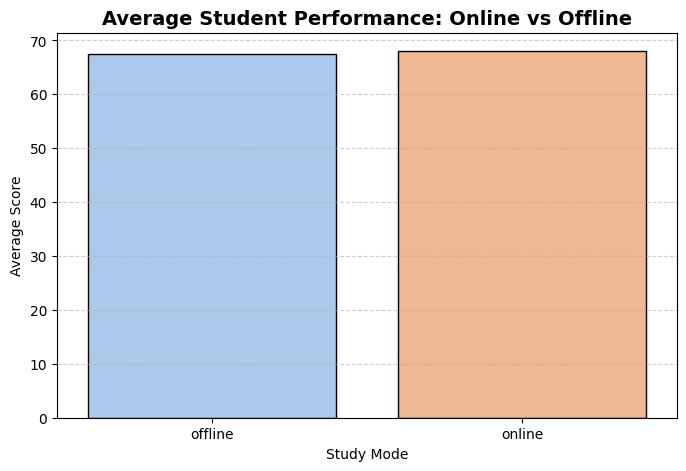

In [94]:
avg_perf = df.groupby('study_mode')['average_score'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_perf, x='study_mode', y='average_score', palette='pastel', edgecolor='black')
plt.title("Average Student Performance: Online vs Offline", fontsize=14, fontweight='bold')
plt.xlabel("Study Mode")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\its abdul salam\AppData\Local\Temp\ipykernel_9620\926525943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='parental level of education', y='average_score', palette='pastel', edgecolor='black')


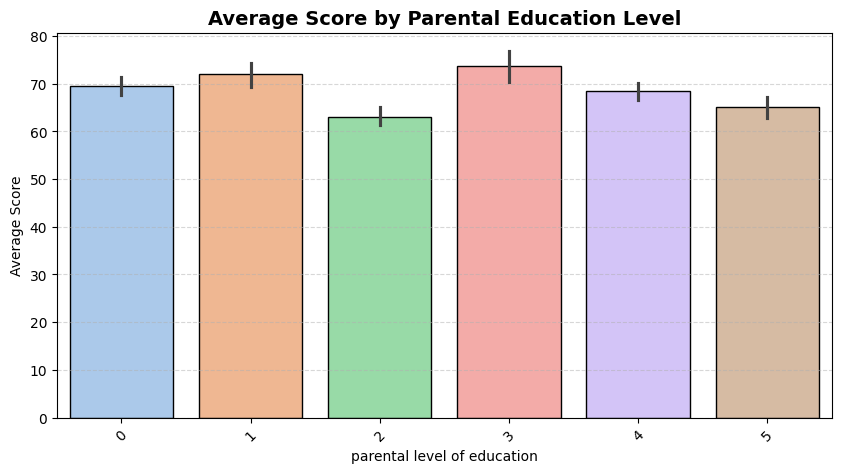

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='parental level of education', y='average_score', palette='pastel', edgecolor='black')
plt.title("Average Score by Parental Education Level", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [96]:
gender_perf = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
print(gender_perf)

   gender  math score  reading score  writing score
0       0   63.633205      72.608108      72.467181
1       1   68.728216      65.473029      63.311203


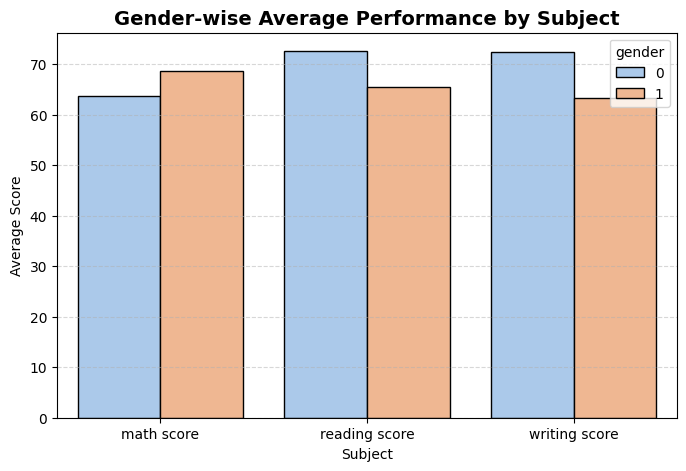

In [97]:
df_melted = gender_perf.melt(id_vars='gender', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(8,5))
sns.barplot(data=df_melted, x='Subject', y='Average Score', hue='gender', palette='pastel', edgecolor='black')
plt.title("Gender-wise Average Performance by Subject", fontsize=14, fontweight='bold')
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\its abdul salam\AppData\Local\Temp\ipykernel_9620\3125022707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='test preparation course', y='average_score', palette='pastel', edgecolor='black')


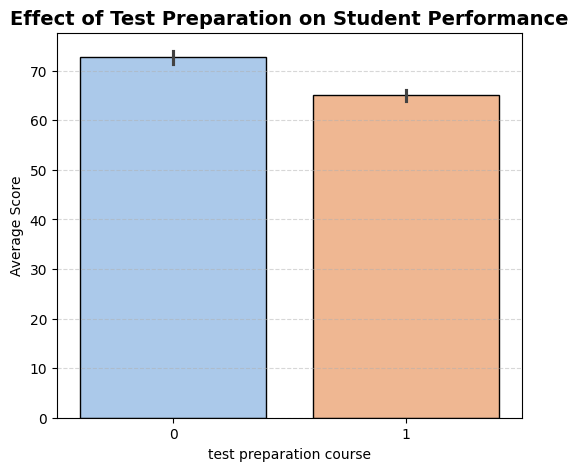

In [98]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='test preparation course', y='average_score', palette='pastel', edgecolor='black')
plt.title("Effect of Test Preparation on Student Performance", fontsize=14, fontweight='bold')
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

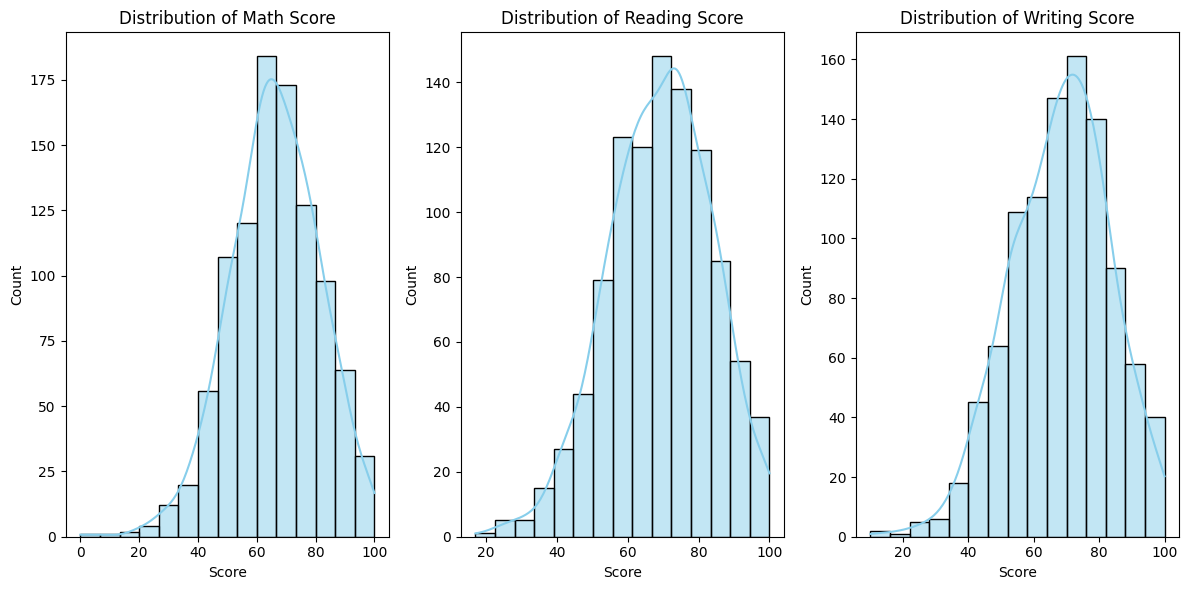

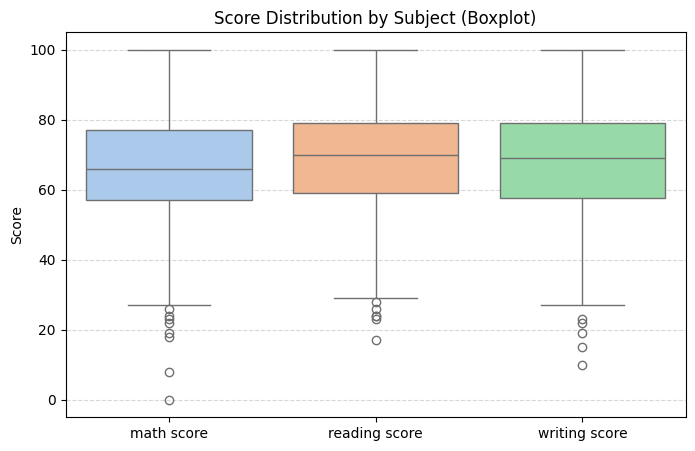

In [99]:
plt.figure(figsize=(12,6))

subjects = ['math score', 'reading score', 'writing score']

for i, subject in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[subject], bins=15, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {subject.title()}")
    plt.xlabel("Score")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Boxplots for all subjects
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette='pastel')
plt.title("Score Distribution by Subject (Boxplot)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

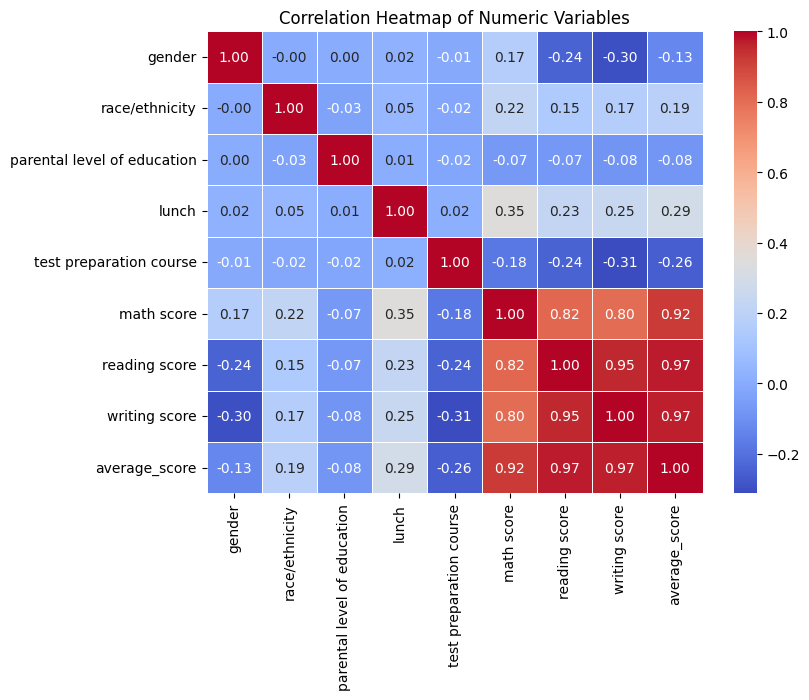

In [100]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

Correlation with Average Score:
 average_score                  1.000000
reading score                  0.970331
writing score                  0.965667
math score                     0.918746
lunch                          0.290064
race/ethnicity                 0.185168
parental level of education   -0.078883
gender                        -0.130861
test preparation course       -0.256710
Name: average_score, dtype: float64


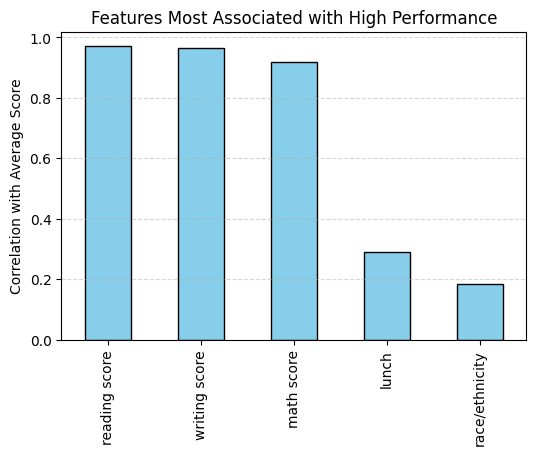

In [101]:
    # Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# 2️⃣ Correlation with performance
corr_perf = numeric_df.corr()['average_score'].sort_values(ascending=False)
print("Correlation with Average Score:\n", corr_perf)

# 3️⃣ Visualization of top correlated features
plt.figure(figsize=(6,4))
corr_perf.drop('average_score').head(5).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Features Most Associated with High Performance")
plt.ylabel("Correlation with Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [102]:
#Machine Learning Task

In [103]:
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 
            'lunch', 'test preparation course', 'study_mode', 'performance']:
    df[col] = le.fit_transform(df[col])

In [104]:
X = df[['gender', 'race/ethnicity', 'parental level of education',
        'lunch', 'test preparation course', 'study_mode', 
        'math score', 'reading score', 'writing score']]

y = df['performance']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       107
           1       1.00      0.90      0.95        31
           2       0.94      1.00      0.97        62

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



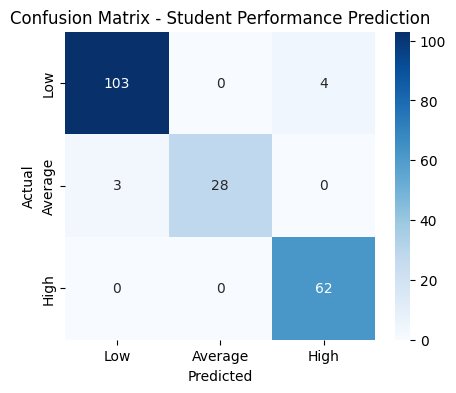

In [108]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low','Average','High'], yticklabels=['Low','Average','High'])
plt.title("Confusion Matrix - Student Performance Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [109]:
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education',
            'lunch', 'test preparation course', 'study_mode', 'performance']:
    df[col] = le.fit_transform(df[col])

In [110]:
X = df[['gender', 'race/ethnicity', 'parental level of education',
        'lunch', 'test preparation course', 'study_mode',
        'math score', 'reading score', 'writing score']]
y = df['performance']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.94      0.97        31
           2       1.00      1.00      1.00        62

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200



C:\Users\its abdul salam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


🔹 Decision Tree Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.96      0.87      0.92        31
           2       0.92      0.95      0.94        62

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



In [114]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       107
           1       1.00      0.90      0.95        31
           2       0.94      1.00      0.97        62

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [115]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ]
})
print(results)


                 Model  Accuracy
0  Logistic Regression     0.990
1        Decision Tree     0.935
2        Random Forest     0.965


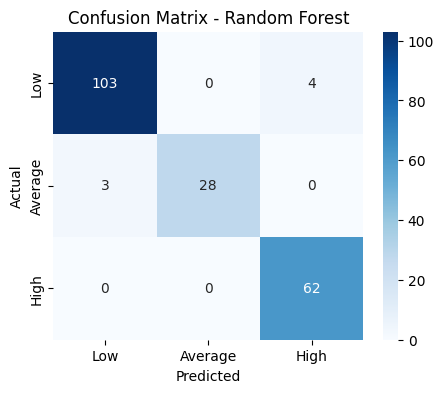

In [116]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Average','High'], yticklabels=['Low','Average','High'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Model: Random Forest
Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       107
           1       1.00      0.90      0.95        31
           2       0.94      1.00      0.97        62

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



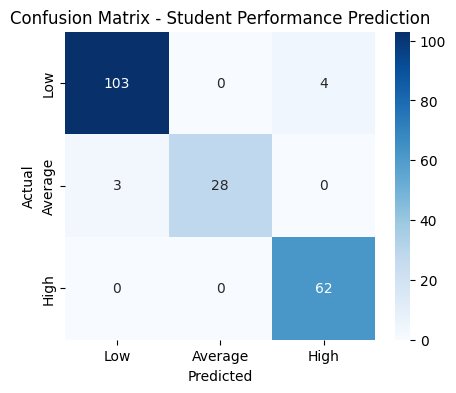

In [117]:
y_pred = rf_model.predict(X_test)

# 3️⃣ Evaluate model
print("Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4️⃣ Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Average','High'], yticklabels=['Low','Average','High'])
plt.title("Confusion Matrix - Student Performance Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\its abdul salam\AppData\Local\Temp\ipykernel_9620\767372918.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='pastel', edgecolor='black')


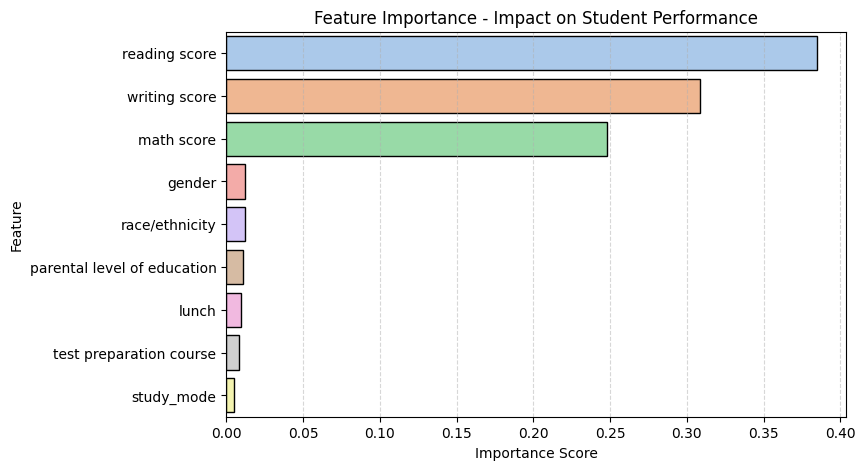

                       Feature  Importance
7                reading score    0.384483
8                writing score    0.308525
6                   math score    0.247916
0                       gender    0.012477
1               race/ethnicity    0.012018
2  parental level of education    0.010853
3                        lunch    0.009911
4      test preparation course    0.008580
5                   study_mode    0.005237


In [119]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='pastel', edgecolor='black')
plt.title("Feature Importance - Impact on Student Performance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

print(feature_importance)
